In [61]:
import pandas as pd
import os
import sys
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
# Get the current working directory
current_dir = os.getcwd() 

# Calculate the parent directory (or the project root)
project_root = os.path.dirname(current_dir)

# Append it to sys.path
sys.path.append(project_root)

In [63]:
# Define the paths relative to the project root
relative_head_path = r"data\Head\metrics_head.json"
relative_neckHead_path = r"data\NeckHead\metrics_neckHead.json"
relative_entireModel_path = r"data\EntireModel\metrics_entireModel.json"
relative_classes_path = r"PlayingCardDetection-1\data.yaml"

# Join the project root with the relative paths to get the correct absolute paths
head_path = os.path.join(project_root, relative_head_path)
neckHead_path = os.path.join(project_root, relative_neckHead_path)
entireModel_path = os.path.join(project_root, relative_entireModel_path)
classes_path = os.path.join(project_root, relative_classes_path)

In [64]:
metrics_head = pd.read_json(head_path, orient='split')
metrics_neckHead = pd.read_json(neckHead_path, orient='split')
metrics_entireModel = pd.read_json(entireModel_path, orient='split')

'''
# Add runtime column for each approach (adjust values if needed)
metrics_head['runtime'] = "35m 25s"
metrics_neckHead['runtime'] = "26m 17s"
metrics_entireModel['runtime'] = "24m 11s"
'''

'\n# Add runtime column for each approach (adjust values if needed)\nmetrics_head[\'runtime\'] = "35m 25s"\nmetrics_neckHead[\'runtime\'] = "26m 17s"\nmetrics_entireModel[\'runtime\'] = "24m 11s"\n'

In [65]:
# 1. Read the YAML file
with open(classes_path, 'r') as f:
    yaml_data = yaml.safe_load(f)

# Extract the names and create a mapping
names = yaml_data['names']

# Create the DataFrame with class IDs (0-51 for cards, 52 for background)
df_class_map = pd.DataFrame({
    'class_id': list(range(len(names))) + [52],
    'class_name': names + ['background']
})

In [66]:
metrics_head = metrics_head.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])
metrics_neckHead = metrics_neckHead.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])
metrics_entireModel = metrics_entireModel.merge(df_class_map, left_on='Class_Index', right_on='class_id', how='left').drop(columns=['class_id', 'Class_Index','class_name'])

In [67]:
metrics_head.head()

,Class_Name,Precision,Recall,mAP50,mAP50-95,F1_Score
0,10C,0.979212,0.976744,0.991148,0.860924,0.977976
1,10D,0.956212,0.981366,0.987470,0.841252,0.968626
2,10H,0.974963,0.986486,0.993852,0.888635,0.980690
3,10S,0.953837,0.986928,0.991874,0.845709,0.970100
4,2C,0.920270,0.944444,0.981703,0.865100,0.932200


In [68]:
methods = {
    'Head Model': metrics_head,
    'NeckHead Model': metrics_neckHead,
    'Entire Model': metrics_entireModel
}


Head Model
   Class_Name  Precision    Recall     mAP50  mAP50-95  F1_Score
0         10C   0.979212  0.976744  0.991148  0.860924  0.977976
1         10D   0.956212  0.981366  0.987470  0.841252  0.968626
2         10H   0.974963  0.986486  0.993852  0.888635  0.980690
3         10S   0.953837  0.986928  0.991874  0.845709  0.970100
4          2C   0.920270  0.944444  0.981703  0.865100  0.932200
5          2D   0.867024  0.921212  0.963038  0.835563  0.893297
6          2H   0.925409  0.881333  0.974351  0.847665  0.902833
7          2S   0.913246  0.922076  0.964789  0.852829  0.917639
8          3C   0.926844  0.954545  0.980615  0.856480  0.940490
9          3D   0.753981  0.908855  0.903486  0.776481  0.824205
10         3H   0.906299  0.863593  0.955616  0.817595  0.884430
11         3S   0.788214  0.887324  0.919453  0.776112  0.834837
12         4C   0.953302  0.936416  0.986482  0.838354  0.944783
13         4D   0.897119  0.966387  0.979017  0.840908  0.930465
14         4H

C:\Users\Besitzer\AppData\Local\Temp\ipykernel_30264\2119988730.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(metrics_cols, rotation=45, ha='right', fontsize=9)


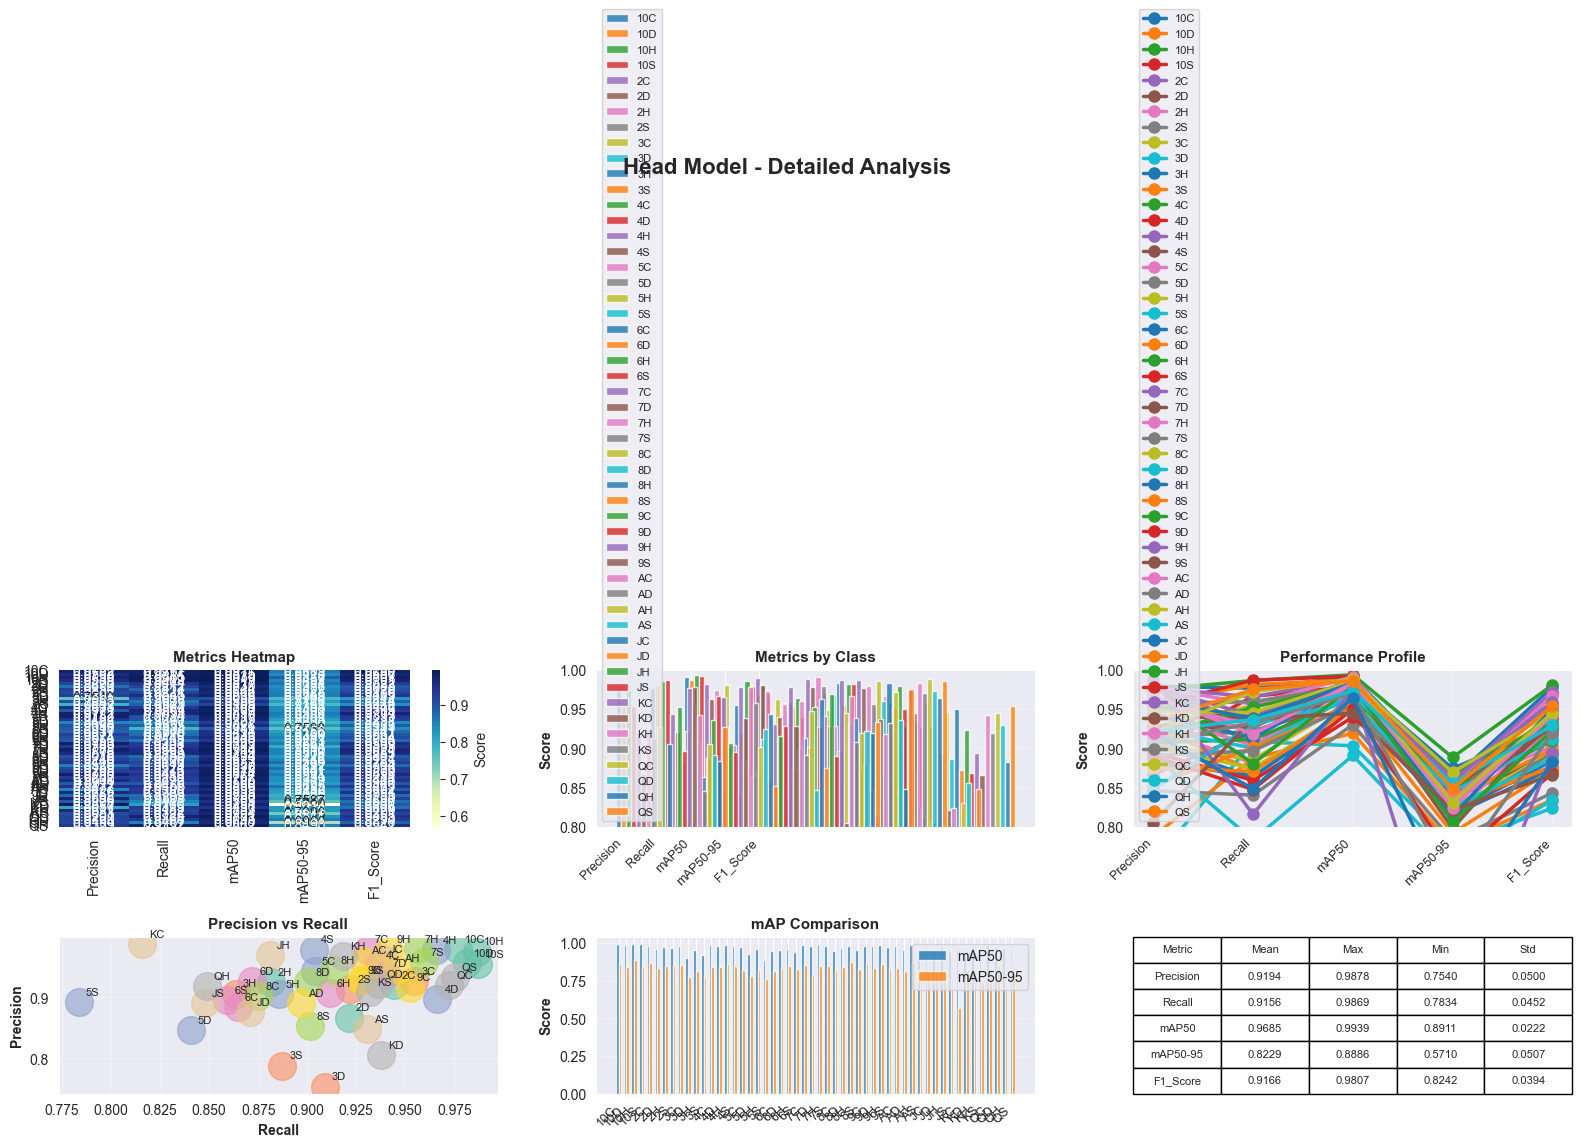


Class-wise Breakdown:

  10C:
    Precision: 0.9792
    Recall: 0.9767
    mAP50: 0.9911
    mAP50-95: 0.8609
    F1_Score: 0.9780

  10D:
    Precision: 0.9562
    Recall: 0.9814
    mAP50: 0.9875
    mAP50-95: 0.8413
    F1_Score: 0.9686

  10H:
    Precision: 0.9750
    Recall: 0.9865
    mAP50: 0.9939
    mAP50-95: 0.8886
    F1_Score: 0.9807

  10S:
    Precision: 0.9538
    Recall: 0.9869
    mAP50: 0.9919
    mAP50-95: 0.8457
    F1_Score: 0.9701

  2C:
    Precision: 0.9203
    Recall: 0.9444
    mAP50: 0.9817
    mAP50-95: 0.8651
    F1_Score: 0.9322

  2D:
    Precision: 0.8670
    Recall: 0.9212
    mAP50: 0.9630
    mAP50-95: 0.8356
    F1_Score: 0.8933

  2H:
    Precision: 0.9254
    Recall: 0.8813
    mAP50: 0.9744
    mAP50-95: 0.8477
    F1_Score: 0.9028

  2S:
    Precision: 0.9132
    Recall: 0.9221
    mAP50: 0.9648
    mAP50-95: 0.8528
    F1_Score: 0.9176

  3C:
    Precision: 0.9268
    Recall: 0.9545
    mAP50: 0.9806
    mAP50-95: 0.8565
    F1_Score: 0.9405



C:\Users\Besitzer\AppData\Local\Temp\ipykernel_30264\2119988730.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(metrics_cols, rotation=45, ha='right', fontsize=9)


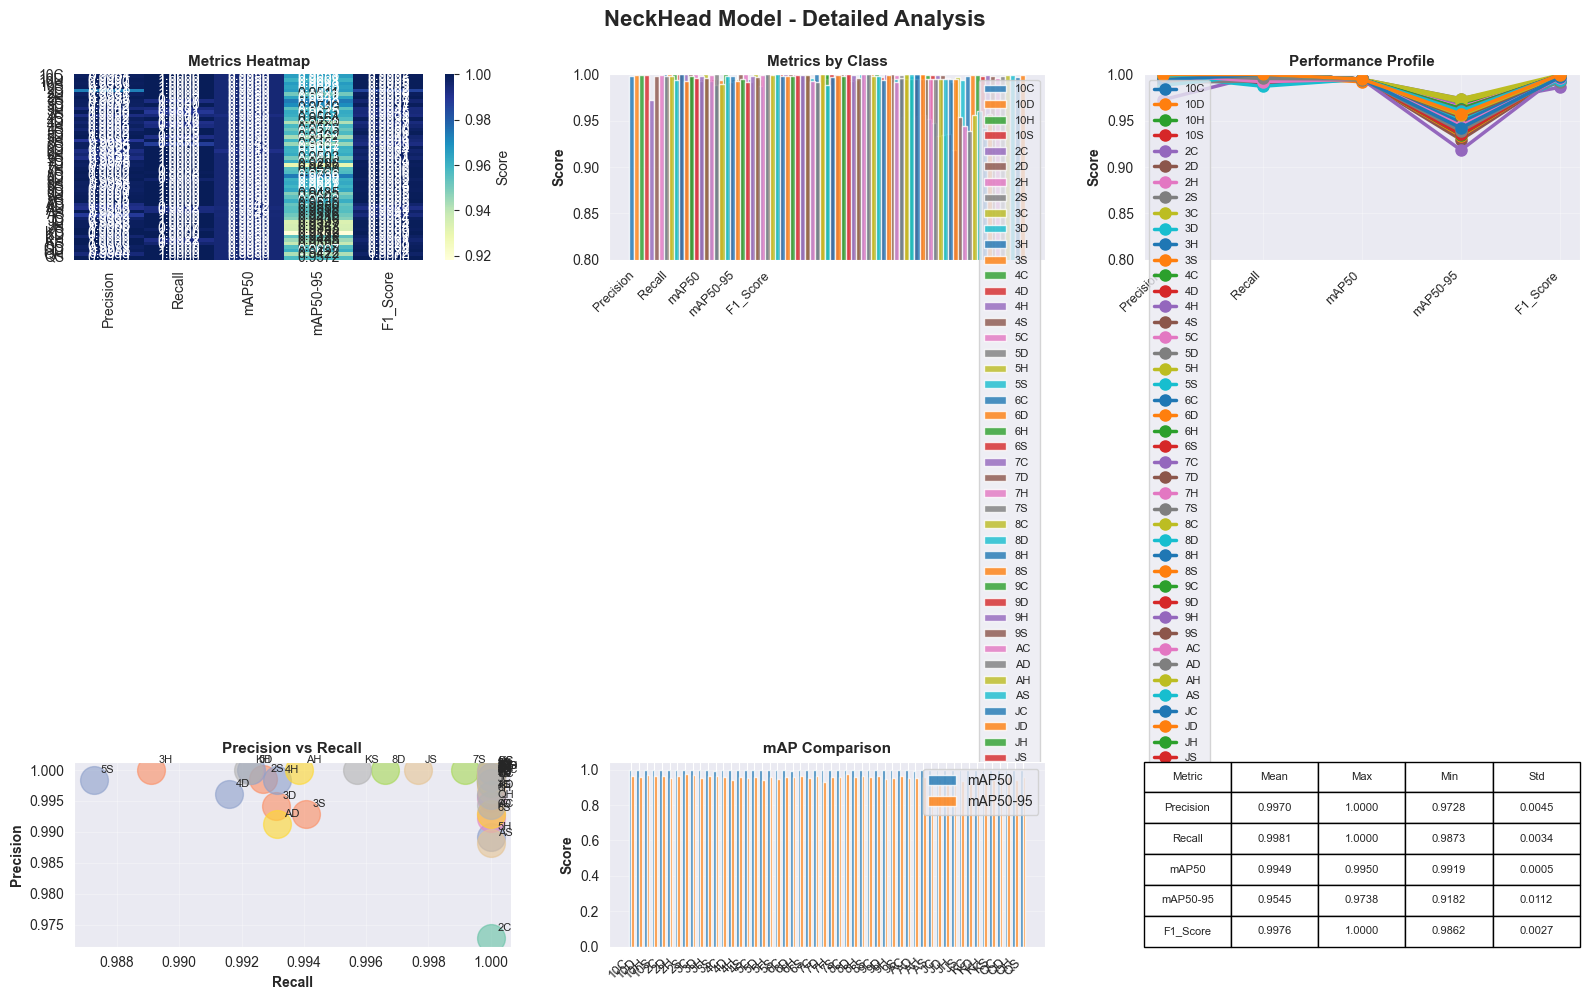


Class-wise Breakdown:

  10C:
    Precision: 0.9984
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9658
    F1_Score: 0.9992

  10D:
    Precision: 0.9991
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9601
    F1_Score: 0.9995

  10H:
    Precision: 0.9990
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9668
    F1_Score: 0.9995

  10S:
    Precision: 0.9991
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9643
    F1_Score: 0.9995

  2C:
    Precision: 0.9728
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9660
    F1_Score: 0.9862

  2D:
    Precision: 0.9981
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9511
    F1_Score: 0.9990

  2H:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9642
    F1_Score: 0.9998

  2S:
    Precision: 0.9986
    Recall: 0.9927
    mAP50: 0.9950
    mAP50-95: 0.9738
    F1_Score: 0.9957

  3C:
    Precision: 0.9983
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9702
    F1_Score: 0.9991



C:\Users\Besitzer\AppData\Local\Temp\ipykernel_30264\2119988730.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(metrics_cols, rotation=45, ha='right', fontsize=9)


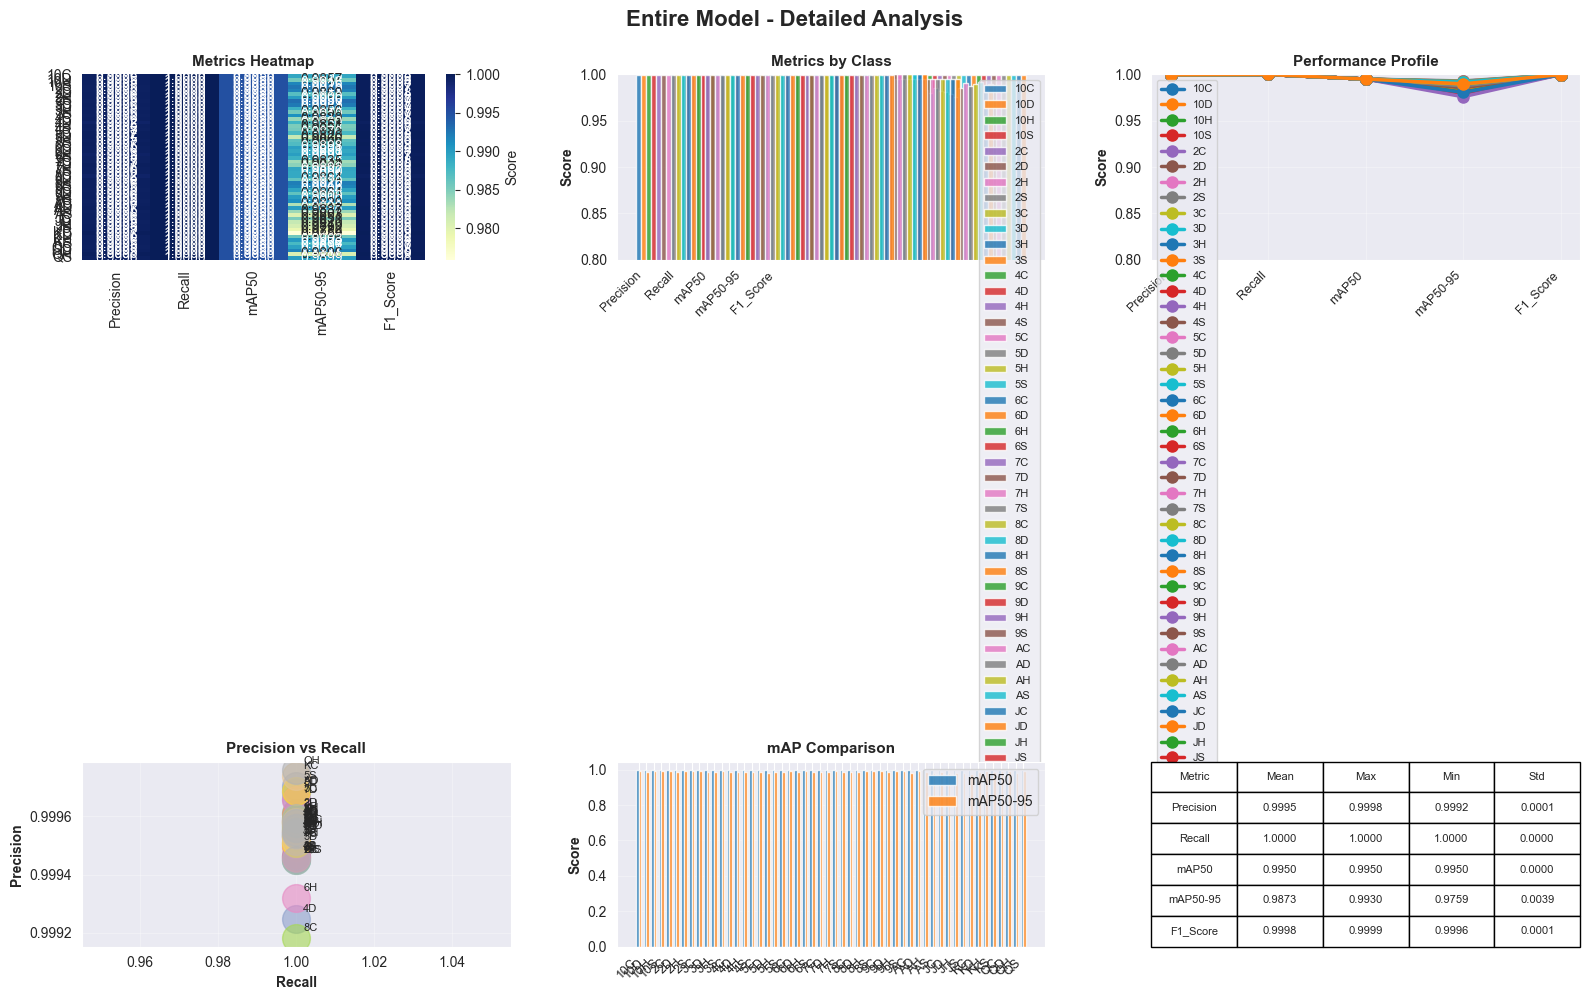


Class-wise Breakdown:

  10C:
    Precision: 0.9996
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9893
    F1_Score: 0.9998

  10D:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9857
    F1_Score: 0.9998

  10H:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9916
    F1_Score: 0.9998

  10S:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9925
    F1_Score: 0.9997

  2C:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9919
    F1_Score: 0.9997

  2D:
    Precision: 0.9996
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9869
    F1_Score: 0.9998

  2H:
    Precision: 0.9996
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9900
    F1_Score: 0.9998

  2S:
    Precision: 0.9995
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9930
    F1_Score: 0.9997

  3C:
    Precision: 0.9996
    Recall: 1.0000
    mAP50: 0.9950
    mAP50-95: 0.9923
    F1_Score: 0.9998



In [70]:
# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 10)

metrics_cols = ['Precision', 'Recall', 'mAP50', 'mAP50-95', 'F1_Score']

# Loop through each method and create detailed plots
for method_name, df in methods.items():
    print(f"\n{'='*60}")
    print(f"{method_name}")
    print(f"{'='*60}")
    print(df)
    print("\n")
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f'{method_name} - Detailed Analysis', fontsize=16, fontweight='bold', y=0.995)
    
    # 1. Heatmap
    ax1 = plt.subplot(2, 3, 1)
    sns.heatmap(df[metrics_cols], annot=True, fmt='.4f', cmap='YlGnBu',
                cbar_kws={'label': 'Score'}, ax=ax1,
                yticklabels=df['Class_Name'])  # let seaborn set matching labels
    ax1.set_title('Metrics Heatmap', fontsize=11, fontweight='bold')
    ax1.set_yticklabels(df['Class_Name'], rotation=0)
    
    # 2. Bar chart for all classes
    ax2 = plt.subplot(2, 3, 2)
    x = np.arange(len(metrics_cols))
    width = 0.15
    for i, (idx, row) in enumerate(df.iterrows()):
        values = [row['Precision'], row['Recall'], row['mAP50'], row['mAP50-95'], row['F1_Score']]
        ax2.bar(x + i*width, values, width, label=row['Class_Name'], alpha=0.8)
    ax2.set_ylabel('Score', fontweight='bold')
    ax2.set_title('Metrics by Class', fontsize=11, fontweight='bold')
    ax2.set_xticks(x + width)
    ax2.set_xticklabels(metrics_cols, rotation=45, ha='right', fontsize=9)
    ax2.legend(fontsize=8)
    ax2.grid(axis='y', alpha=0.3)
    ax2.set_ylim([0.8, 1.0])
    
    # 3. Line plot - performance profile
    ax3 = plt.subplot(2, 3, 3)
    for idx, row in df.iterrows():
        values = [row['Precision'], row['Recall'], row['mAP50'], row['mAP50-95'], row['F1_Score']]
        ax3.plot(metrics_cols, values, marker='o', linewidth=2.5, markersize=8, label=row['Class_Name'])
    ax3.set_ylabel('Score', fontweight='bold')
    ax3.set_title('Performance Profile', fontsize=11, fontweight='bold')
    ax3.set_xticklabels(metrics_cols, rotation=45, ha='right', fontsize=9)
    ax3.legend(fontsize=8)
    ax3.grid(alpha=0.3)
    ax3.set_ylim([0.8, 1.0])
    
    # 4. Precision vs Recall
    ax4 = plt.subplot(2, 3, 4)
    colors = plt.cm.Set2(np.linspace(0, 1, len(df)))
    for i, (idx, row) in enumerate(df.iterrows()):
        ax4.scatter(row['Recall'], row['Precision'], s=400, alpha=0.6, 
                   label=row['Class_Name'], color=colors[i])
        ax4.annotate(row['Class_Name'], (row['Recall'], row['Precision']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax4.set_xlabel('Recall', fontweight='bold')
    ax4.set_ylabel('Precision', fontweight='bold')
    ax4.set_title('Precision vs Recall', fontsize=11, fontweight='bold')
    ax4.grid(alpha=0.3)
    
    # 5. mAP scores
    ax5 = plt.subplot(2, 3, 5)
    x_pos = np.arange(len(df))
    width = 0.35
    ax5.bar(x_pos - width/2, df['mAP50'], width, label='mAP50', alpha=0.8)
    ax5.bar(x_pos + width/2, df['mAP50-95'], width, label='mAP50-95', alpha=0.8)
    ax5.set_ylabel('Score', fontweight='bold')
    ax5.set_title('mAP Comparison', fontsize=11, fontweight='bold')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(df['Class_Name'], rotation=45, ha='right', fontsize=9)
    ax5.legend()
    ax5.grid(axis='y', alpha=0.3)
    
    # 6. Statistics table
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('tight')
    ax6.axis('off')
    
    stats_data = []
    for col in metrics_cols:
        stats_data.append([
            col,
            f"{df[col].mean():.4f}",
            f"{df[col].max():.4f}",
            f"{df[col].min():.4f}",
            f"{df[col].std():.4f}"
        ])
    
    table = ax6.table(cellText=stats_data, 
                      colLabels=['Metric', 'Mean', 'Max', 'Min', 'Std'],
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print stats
    print("\nClass-wise Breakdown:")
    for idx, row in df.iterrows():
        print(f"\n  {row['Class_Name']}:")
        for col in metrics_cols:
            print(f"    {col}: {row[col]:.4f}")

print("\n" + "="*60)
print("CROSS-METHOD COMPARISON")
print("="*60)

# Create comparison dataframe
comparison_data = []
for method_name, df in methods.items():
    for idx, row in df.iterrows():
        comparison_data.append({
            'Method': method_name,
            'Class': row['Class_Name'],
            'Precision': row['Precision'],
            'Recall': row['Recall'],
            'mAP50': row['mAP50'],
            'mAP50-95': row['mAP50-95'],
            'F1_Score': row['F1_Score']
        })

comparison_df = pd.DataFrame(comparison_data)

# Summary by method
print("\nAverage Metrics by Method:")
print(comparison_df.groupby('Method')[metrics_cols].mean().round(4))